# *Day6 檢視與處理 Outliers*
**為何會有 outliers, 常見的 outlier 原因**

    未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
    可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# 設定 data_path
dir_data = 'E:\\python\\ML-day100\\data\\'
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# *請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因*

Numbers of remain columns : 73
SK_ID_CURR  Range ：  100002 - 456255


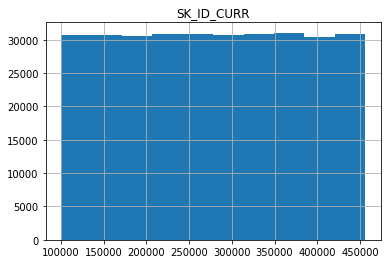

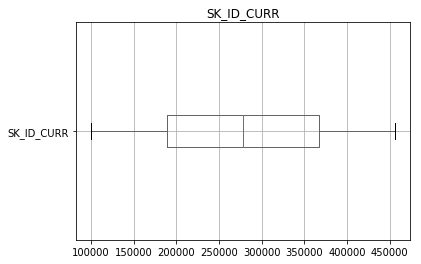

CNT_CHILDREN  Range ：  0 - 19


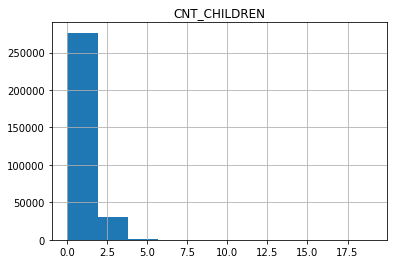

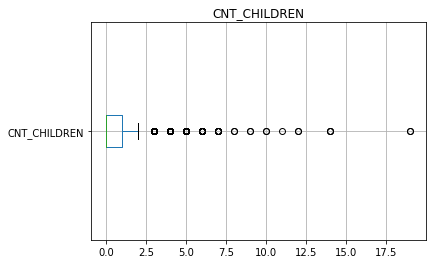

AMT_INCOME_TOTAL  Range ：  25650.0 - 117000000.0


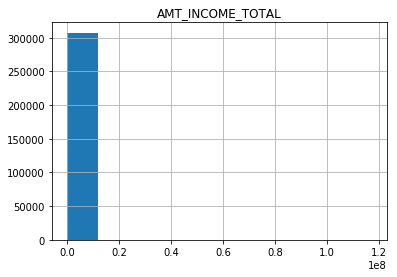

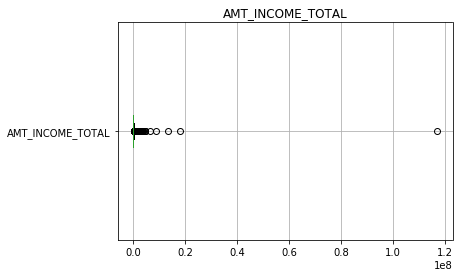

AMT_CREDIT  Range ：  45000.0 - 4050000.0


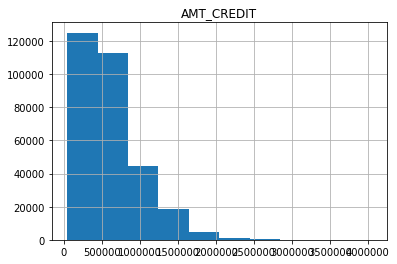

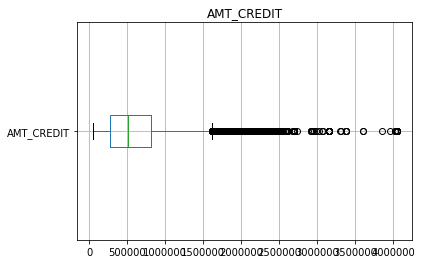

AMT_ANNUITY  Range ：  1615.5 - 258025.5


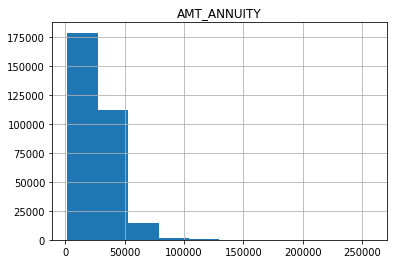

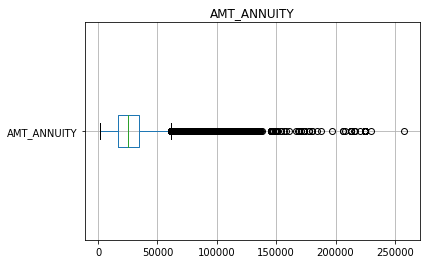

AMT_GOODS_PRICE  Range ：  40500.0 - 4050000.0


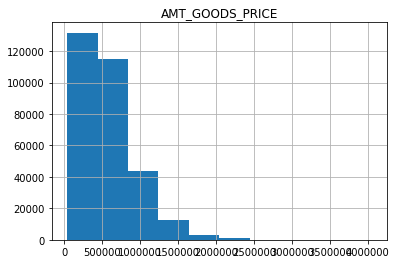

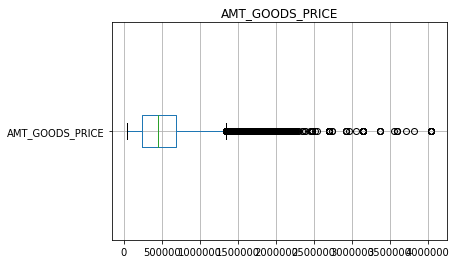

REGION_POPULATION_RELATIVE  Range ：  0.00029 - 0.072508


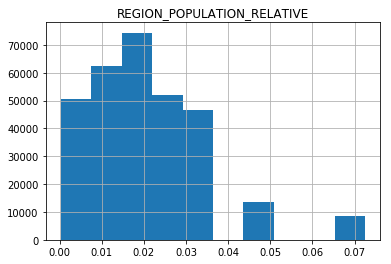

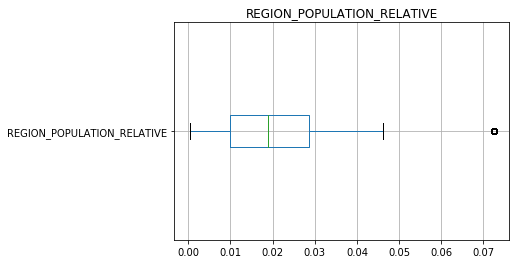

DAYS_BIRTH  Range ：  -25229 - -7489


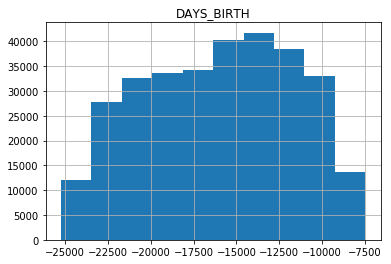

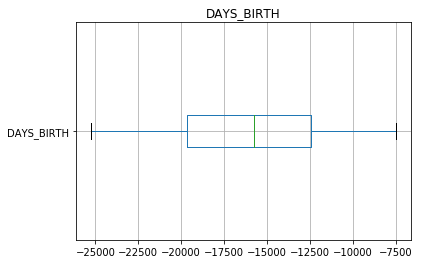

DAYS_EMPLOYED  Range ：  -17912 - 365243


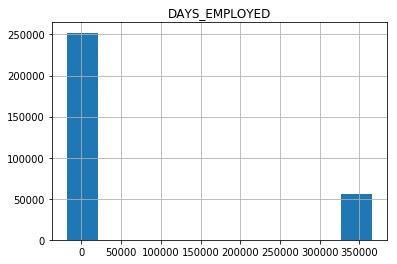

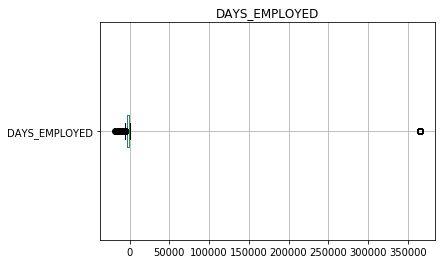

DAYS_REGISTRATION  Range ：  -24672.0 - 0.0


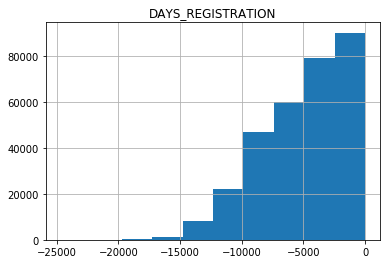

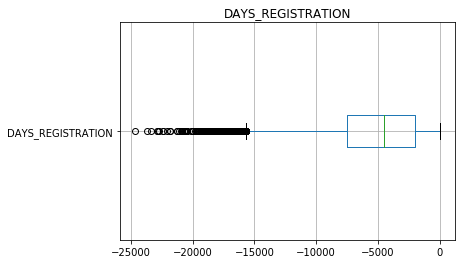

DAYS_ID_PUBLISH  Range ：  -7197 - 0


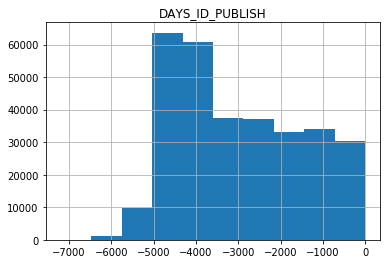

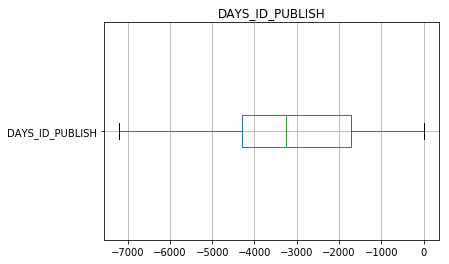

OWN_CAR_AGE  Range ：  0.0 - 91.0


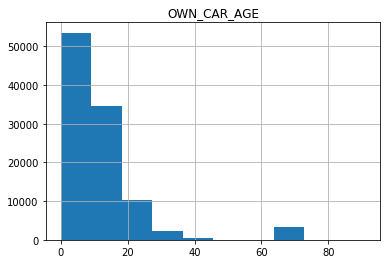

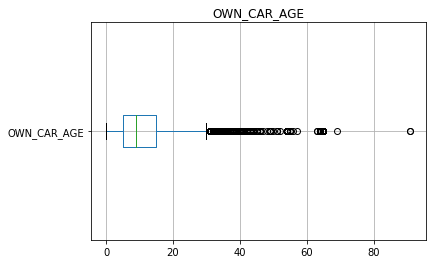

CNT_FAM_MEMBERS  Range ：  1.0 - 20.0


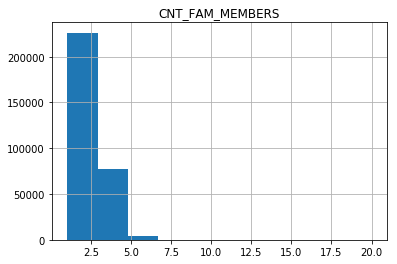

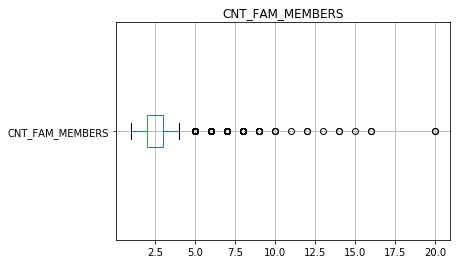

REGION_RATING_CLIENT  Range ：  1 - 3


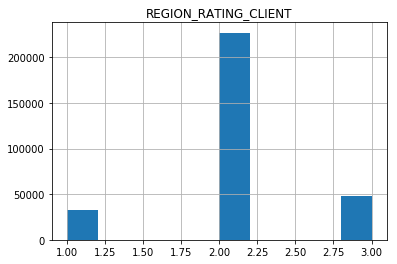

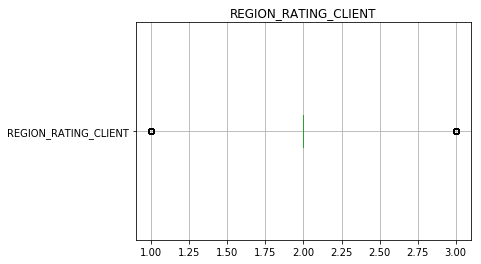

REGION_RATING_CLIENT_W_CITY  Range ：  1 - 3


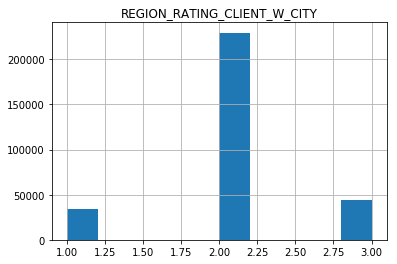

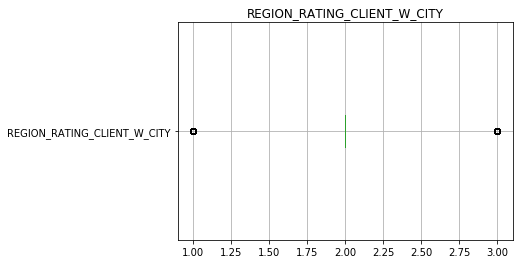

HOUR_APPR_PROCESS_START  Range ：  0 - 23


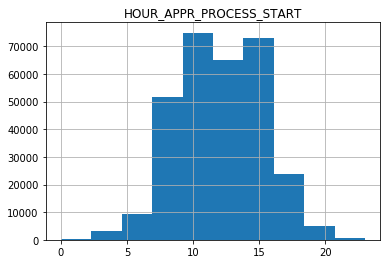

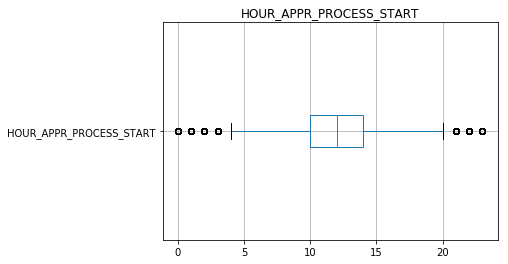

EXT_SOURCE_1  Range ：  0.014568132412445587 - 0.962692770561306


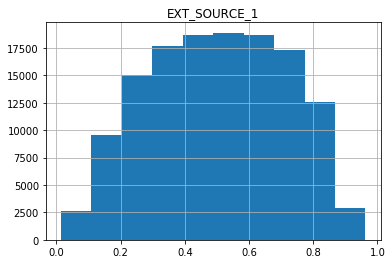

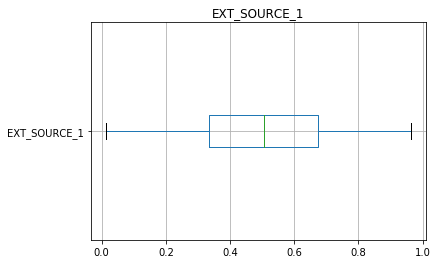

EXT_SOURCE_2  Range ：  8.173616518884397e-08 - 0.8549996664047012


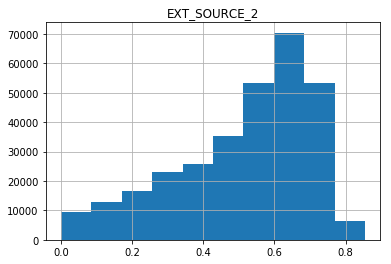

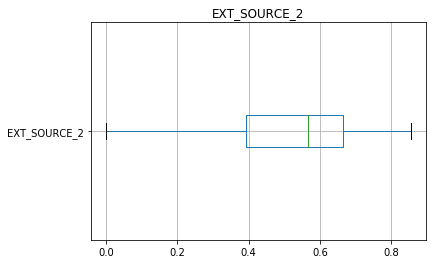

EXT_SOURCE_3  Range ：  0.0005272652387098817 - 0.8960095494948396


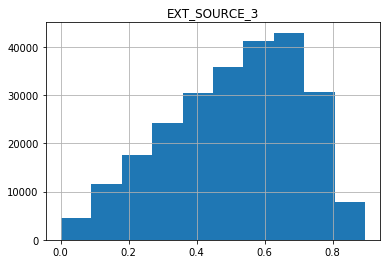

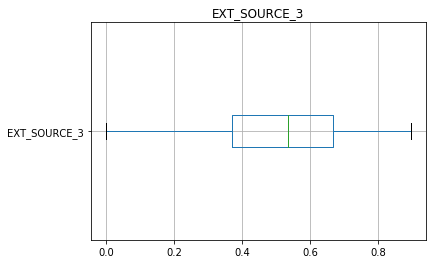

APARTMENTS_AVG  Range ：  0.0 - 1.0


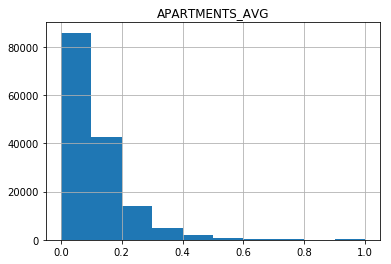

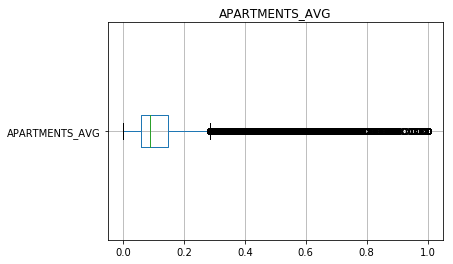

BASEMENTAREA_AVG  Range ：  0.0 - 1.0


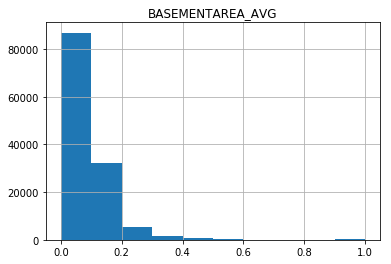

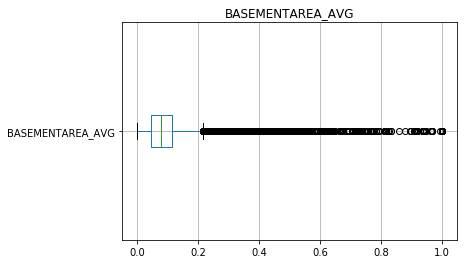

YEARS_BEGINEXPLUATATION_AVG  Range ：  0.0 - 1.0


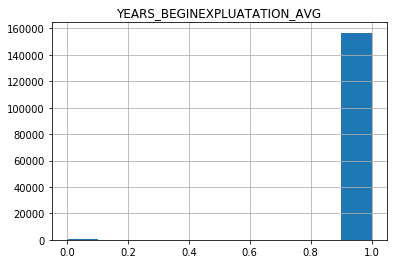

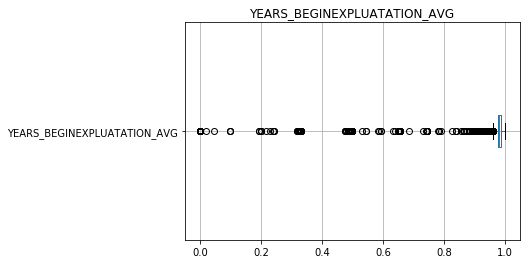

YEARS_BUILD_AVG  Range ：  0.0 - 1.0


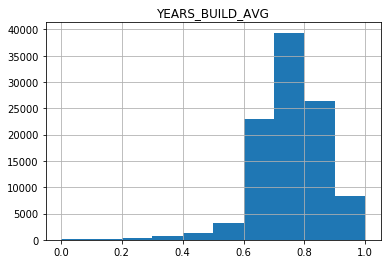

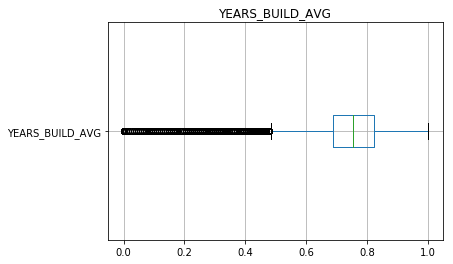

COMMONAREA_AVG  Range ：  0.0 - 1.0


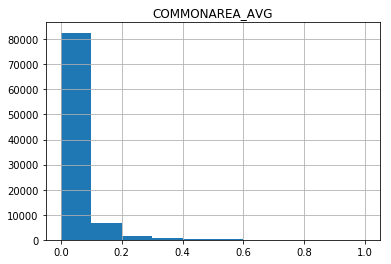

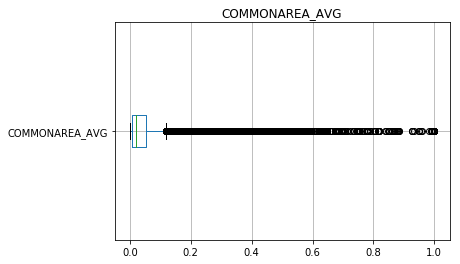

ELEVATORS_AVG  Range ：  0.0 - 1.0


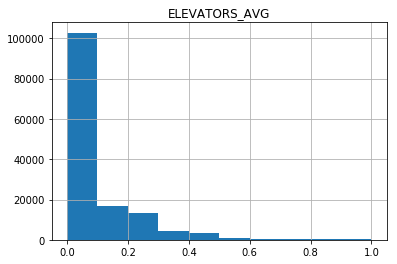

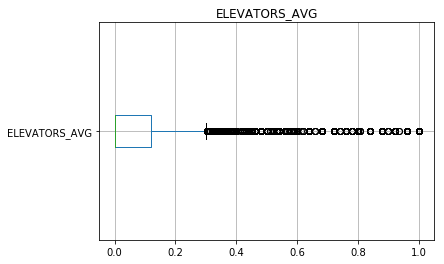

ENTRANCES_AVG  Range ：  0.0 - 1.0


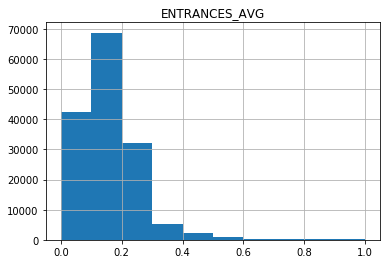

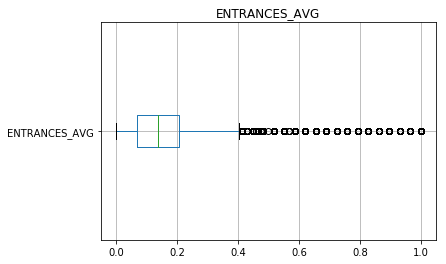

FLOORSMAX_AVG  Range ：  0.0 - 1.0


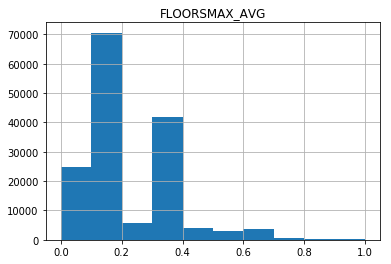

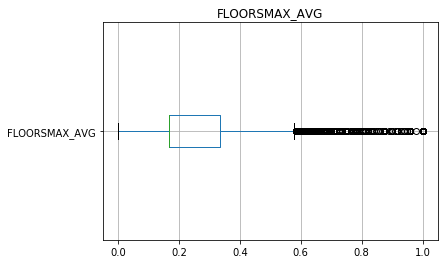

FLOORSMIN_AVG  Range ：  0.0 - 1.0


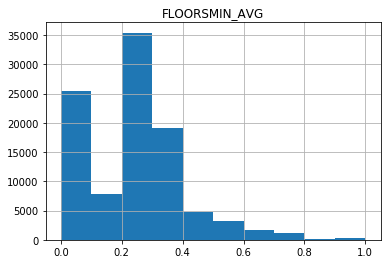

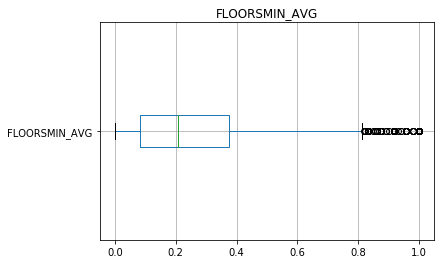

LANDAREA_AVG  Range ：  0.0 - 1.0


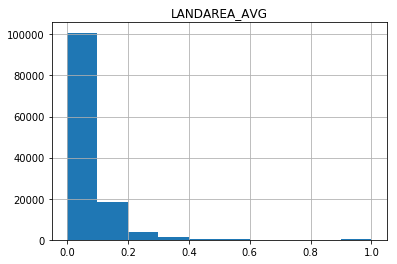

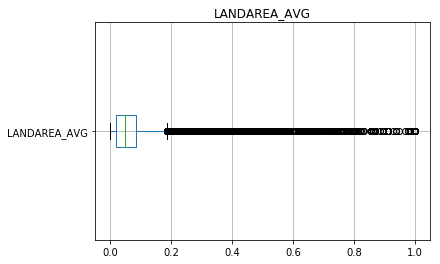

LIVINGAPARTMENTS_AVG  Range ：  0.0 - 1.0


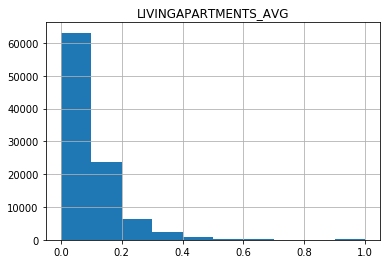

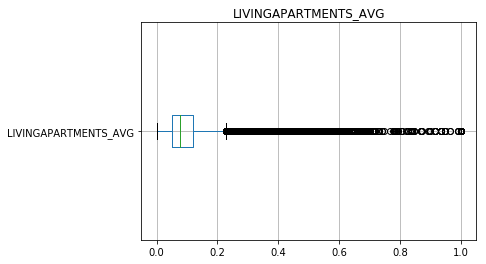

LIVINGAREA_AVG  Range ：  0.0 - 1.0


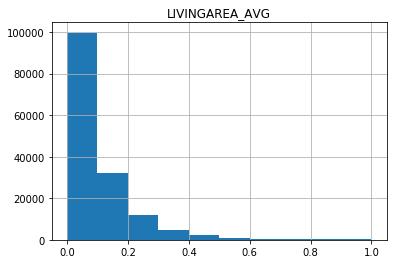

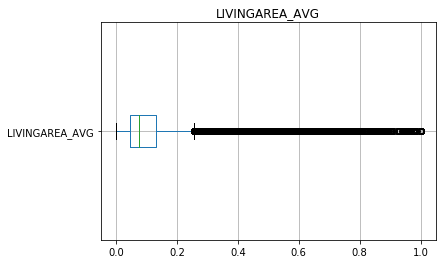

NONLIVINGAPARTMENTS_AVG  Range ：  0.0 - 1.0


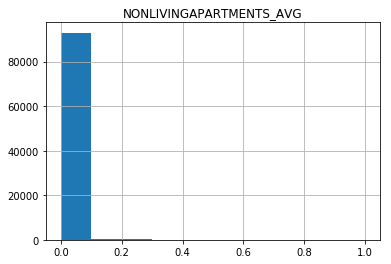

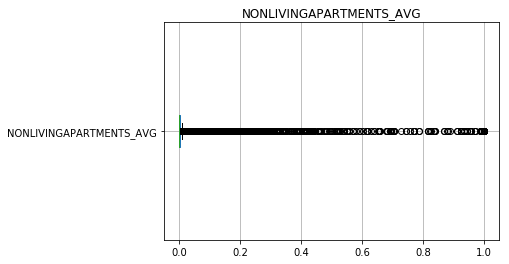

NONLIVINGAREA_AVG  Range ：  0.0 - 1.0


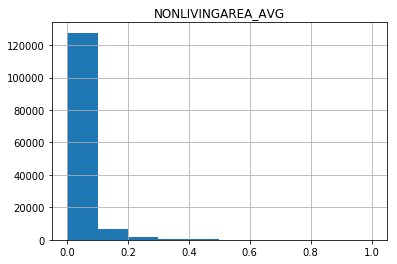

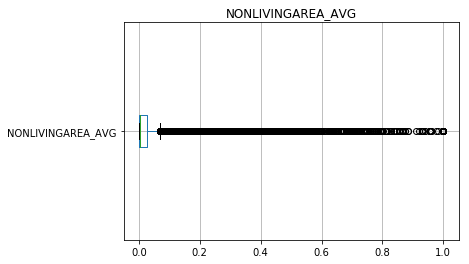

APARTMENTS_MODE  Range ：  0.0 - 1.0


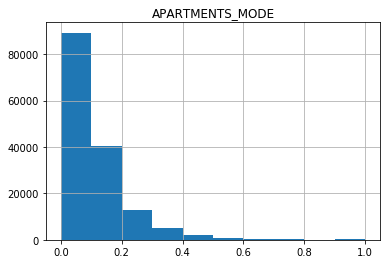

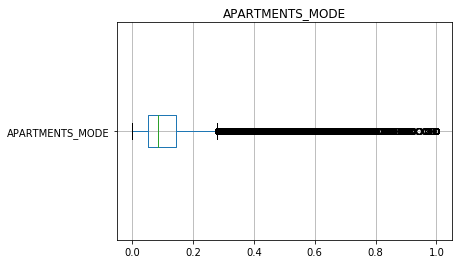

BASEMENTAREA_MODE  Range ：  0.0 - 1.0


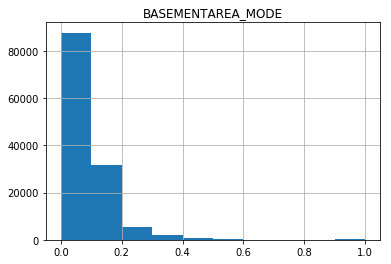

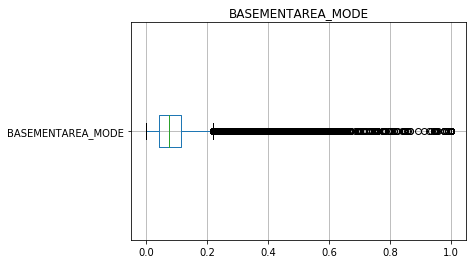

YEARS_BEGINEXPLUATATION_MODE  Range ：  0.0 - 1.0


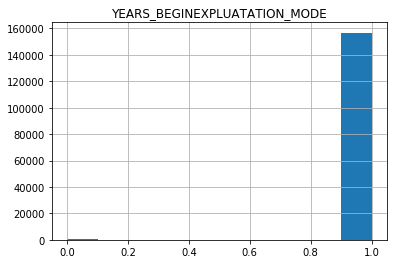

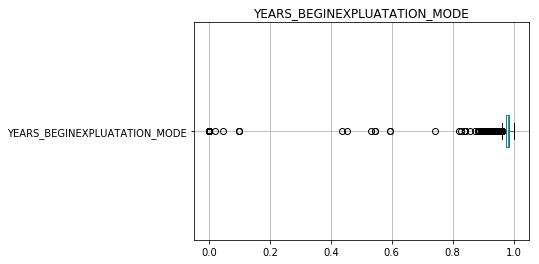

YEARS_BUILD_MODE  Range ：  0.0 - 1.0


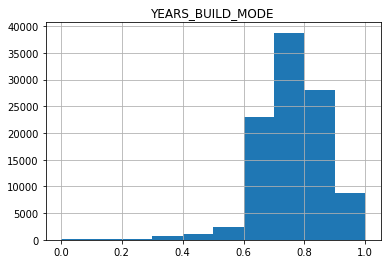

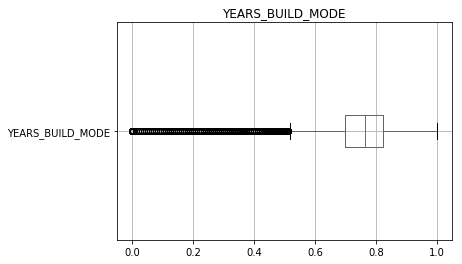

COMMONAREA_MODE  Range ：  0.0 - 1.0


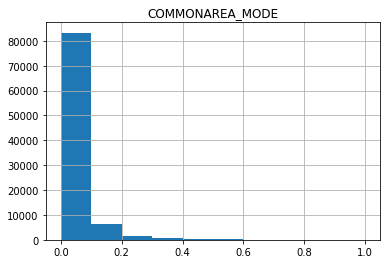

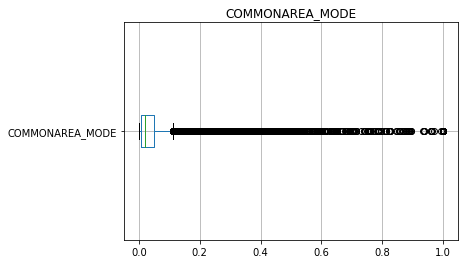

ELEVATORS_MODE  Range ：  0.0 - 1.0


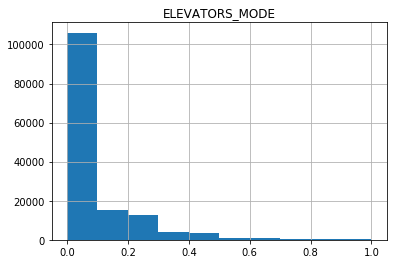

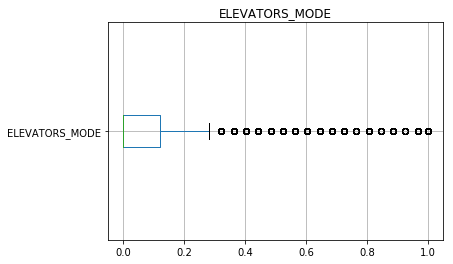

ENTRANCES_MODE  Range ：  0.0 - 1.0


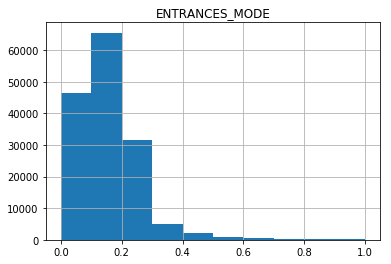

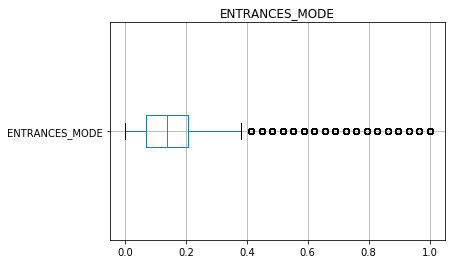

FLOORSMAX_MODE  Range ：  0.0 - 1.0


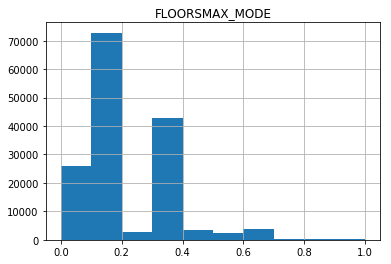

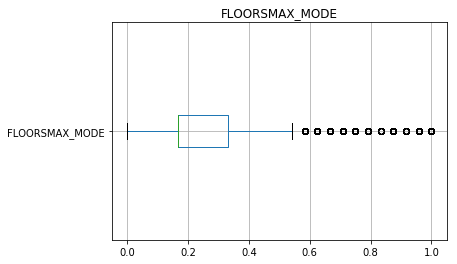

FLOORSMIN_MODE  Range ：  0.0 - 1.0


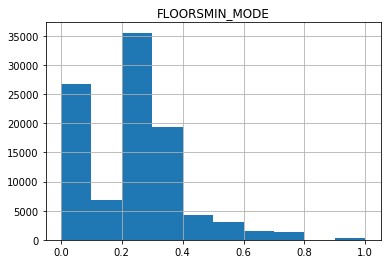

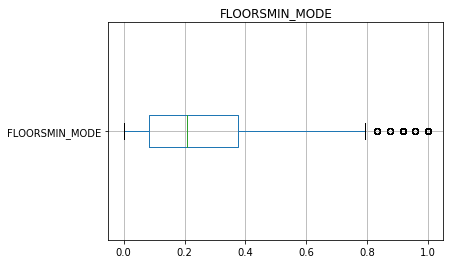

LANDAREA_MODE  Range ：  0.0 - 1.0


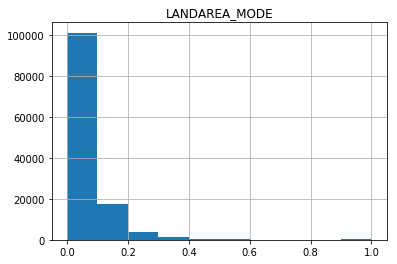

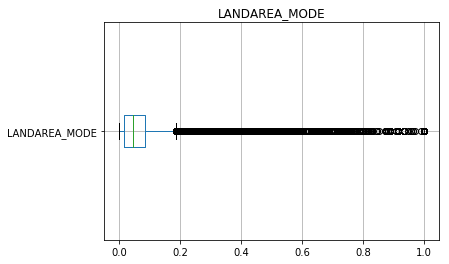

LIVINGAPARTMENTS_MODE  Range ：  0.0 - 1.0


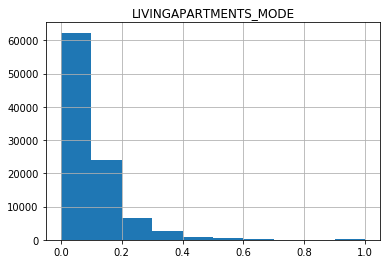

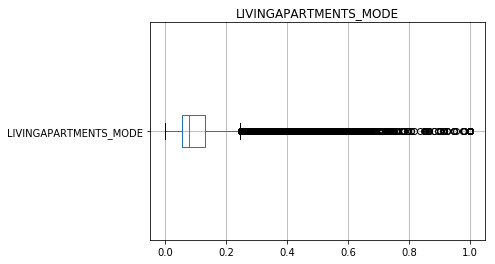

LIVINGAREA_MODE  Range ：  0.0 - 1.0


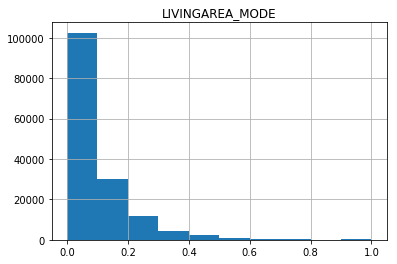

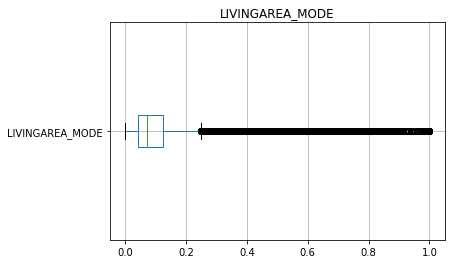

NONLIVINGAPARTMENTS_MODE  Range ：  0.0 - 1.0


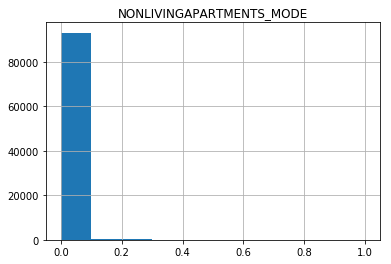

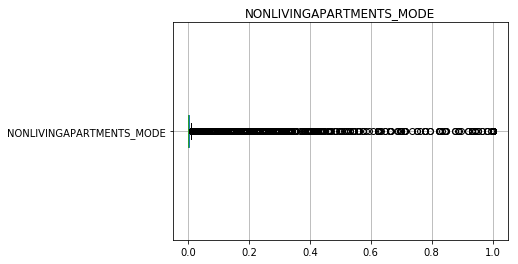

NONLIVINGAREA_MODE  Range ：  0.0 - 1.0


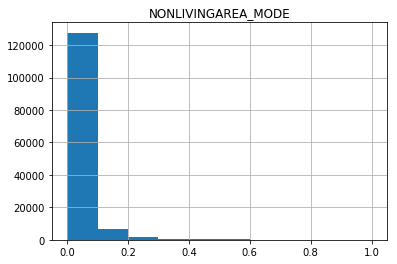

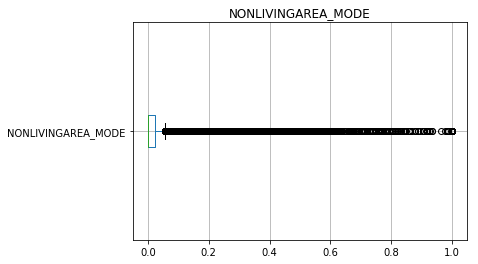

APARTMENTS_MEDI  Range ：  0.0 - 1.0


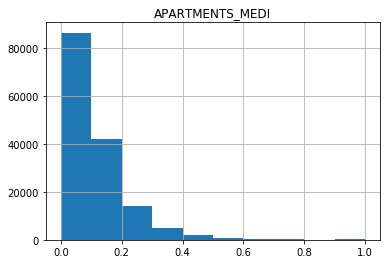

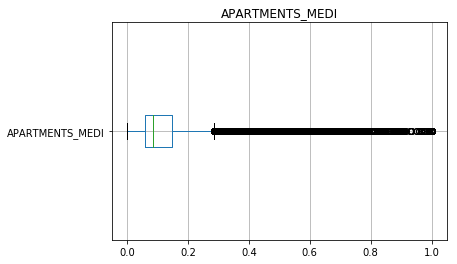

BASEMENTAREA_MEDI  Range ：  0.0 - 1.0


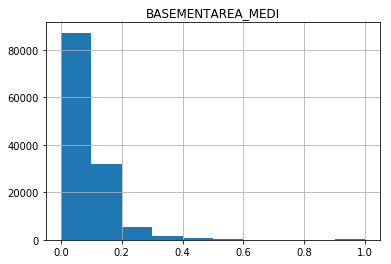

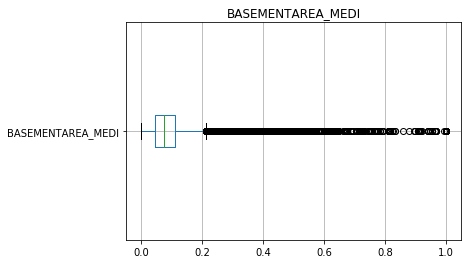

YEARS_BEGINEXPLUATATION_MEDI  Range ：  0.0 - 1.0


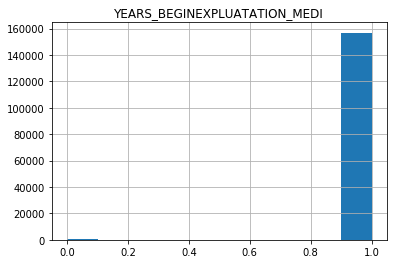

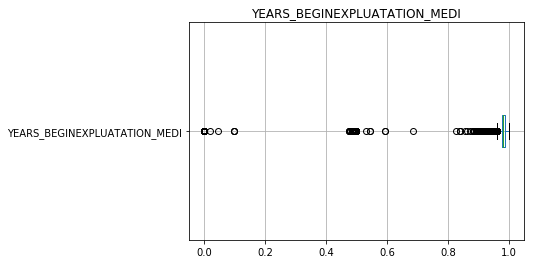

YEARS_BUILD_MEDI  Range ：  0.0 - 1.0


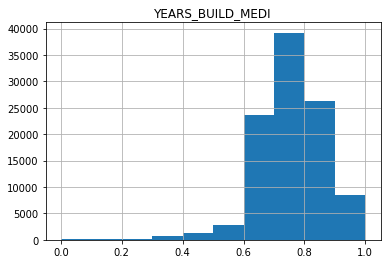

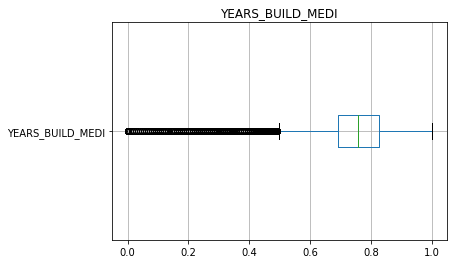

COMMONAREA_MEDI  Range ：  0.0 - 1.0


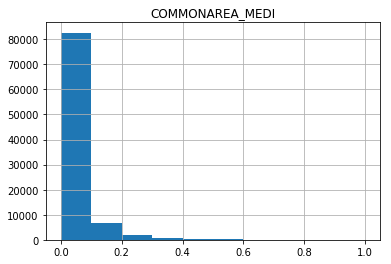

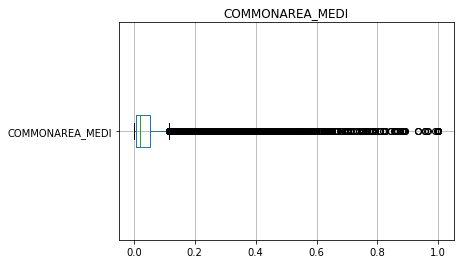

ELEVATORS_MEDI  Range ：  0.0 - 1.0


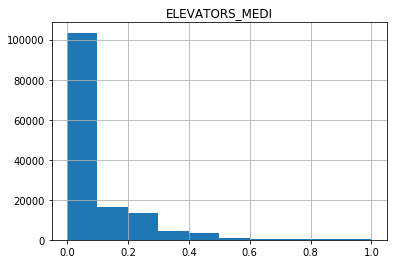

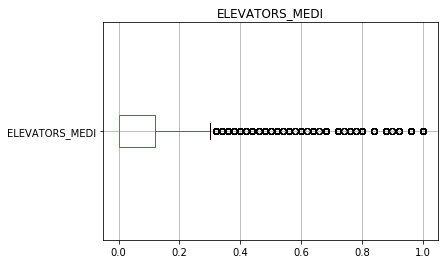

ENTRANCES_MEDI  Range ：  0.0 - 1.0


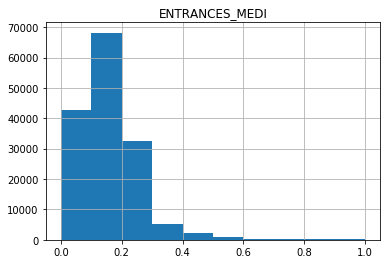

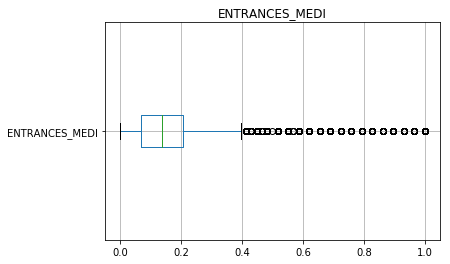

FLOORSMAX_MEDI  Range ：  0.0 - 1.0


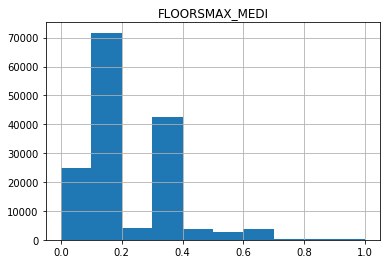

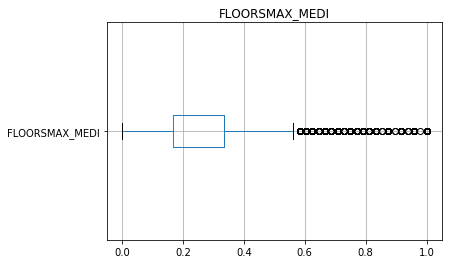

FLOORSMIN_MEDI  Range ：  0.0 - 1.0


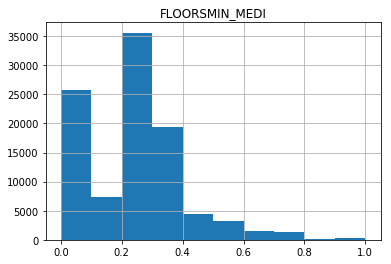

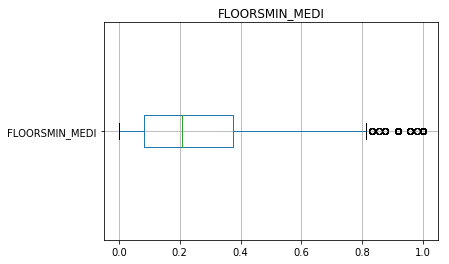

LANDAREA_MEDI  Range ：  0.0 - 1.0


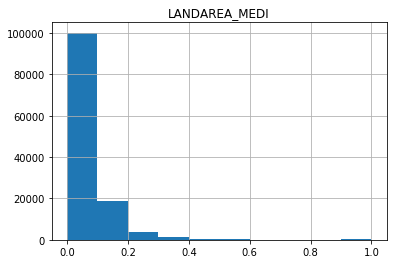

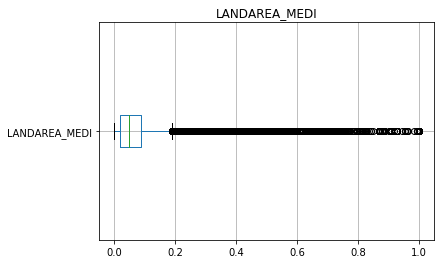

LIVINGAPARTMENTS_MEDI  Range ：  0.0 - 1.0


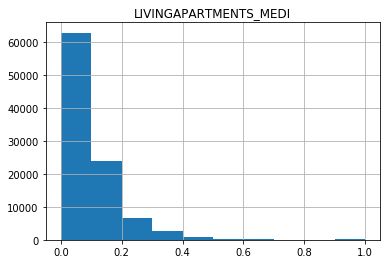

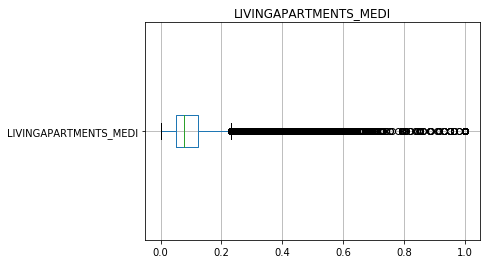

LIVINGAREA_MEDI  Range ：  0.0 - 1.0


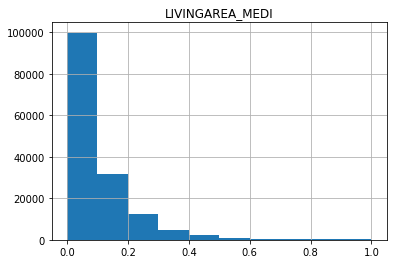

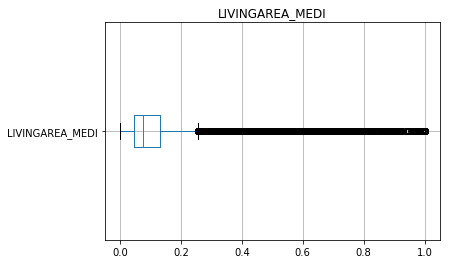

NONLIVINGAPARTMENTS_MEDI  Range ：  0.0 - 1.0


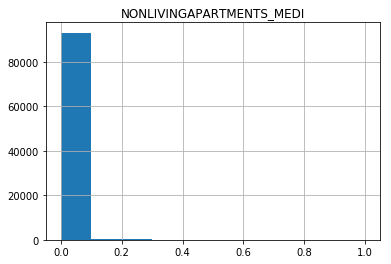

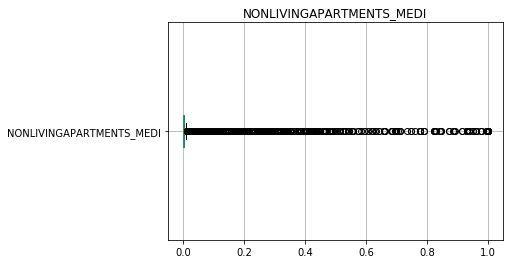

NONLIVINGAREA_MEDI  Range ：  0.0 - 1.0


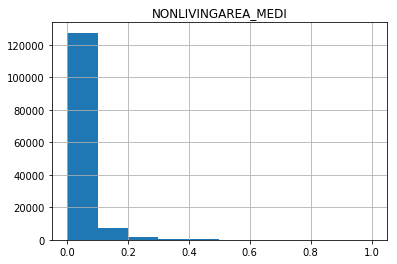

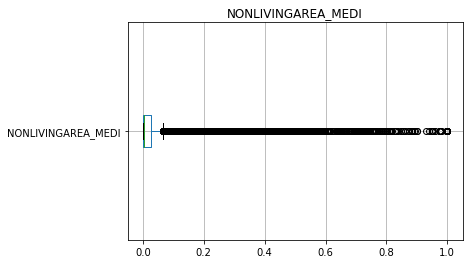

TOTALAREA_MODE  Range ：  0.0 - 1.0


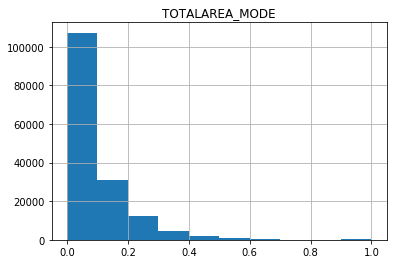

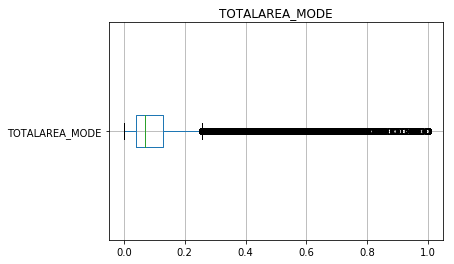

OBS_30_CNT_SOCIAL_CIRCLE  Range ：  0.0 - 348.0


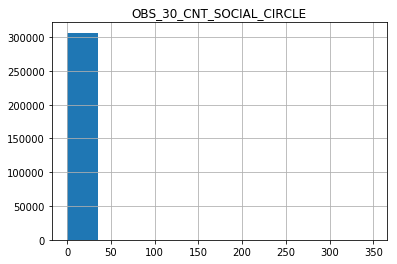

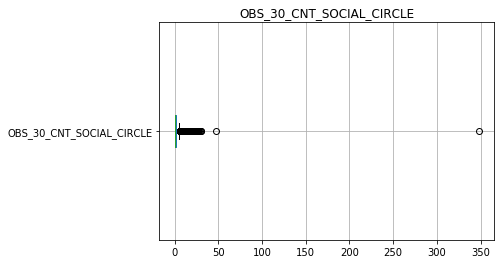

DEF_30_CNT_SOCIAL_CIRCLE  Range ：  0.0 - 34.0


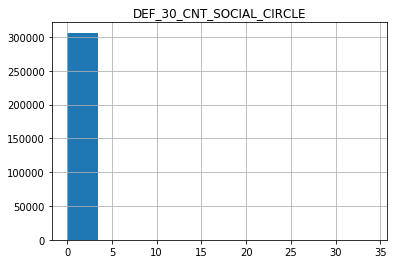

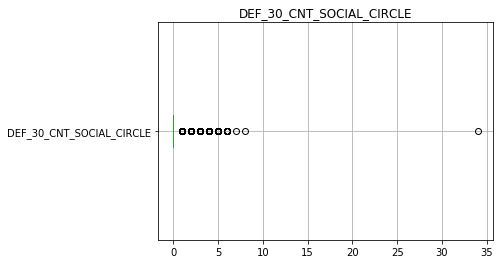

OBS_60_CNT_SOCIAL_CIRCLE  Range ：  0.0 - 344.0


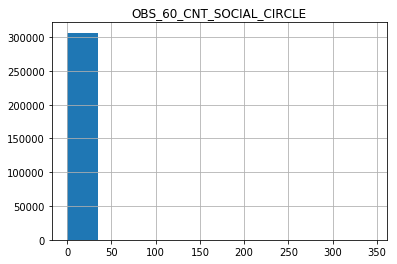

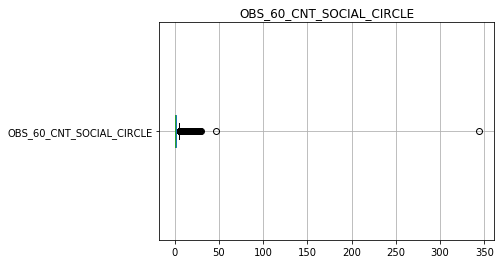

DEF_60_CNT_SOCIAL_CIRCLE  Range ：  0.0 - 24.0


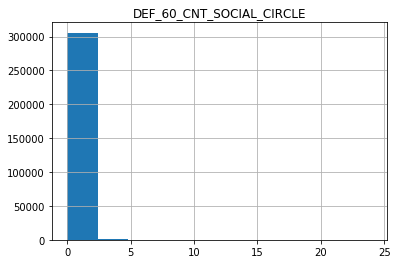

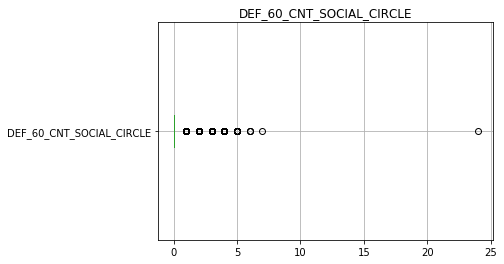

DAYS_LAST_PHONE_CHANGE  Range ：  -4292.0 - 0.0


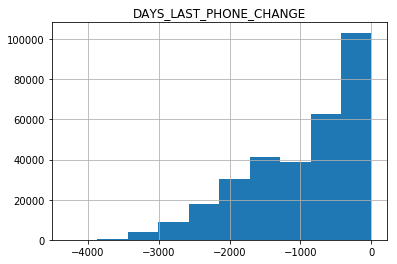

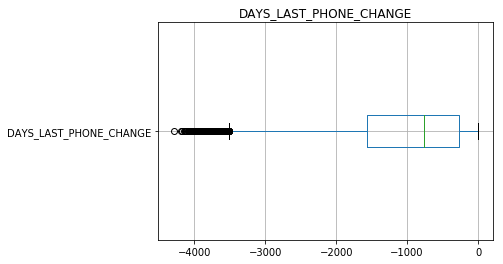

AMT_REQ_CREDIT_BUREAU_HOUR  Range ：  0.0 - 4.0


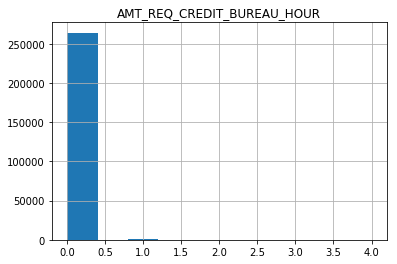

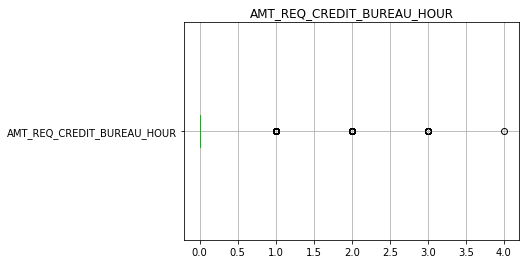

AMT_REQ_CREDIT_BUREAU_DAY  Range ：  0.0 - 9.0


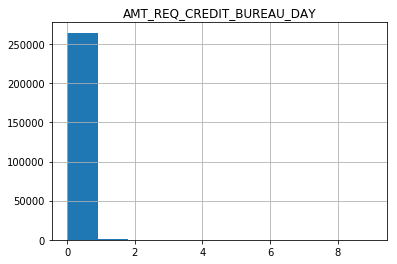

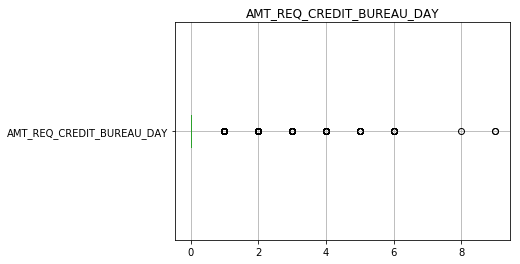

AMT_REQ_CREDIT_BUREAU_WEEK  Range ：  0.0 - 8.0


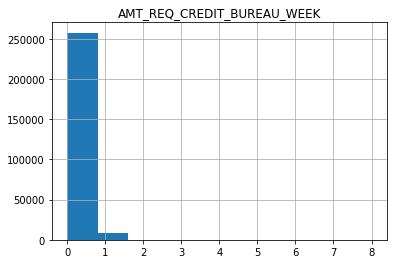

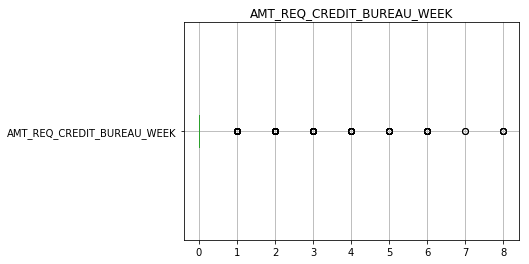

AMT_REQ_CREDIT_BUREAU_MON  Range ：  0.0 - 27.0


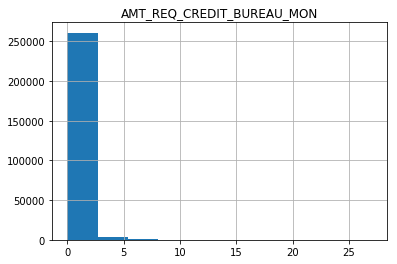

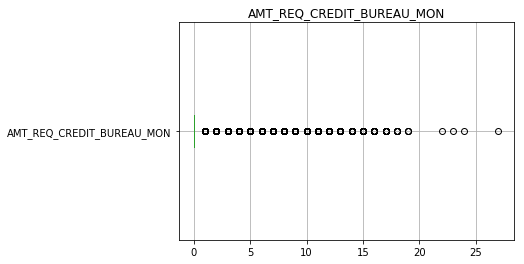

AMT_REQ_CREDIT_BUREAU_QRT  Range ：  0.0 - 261.0


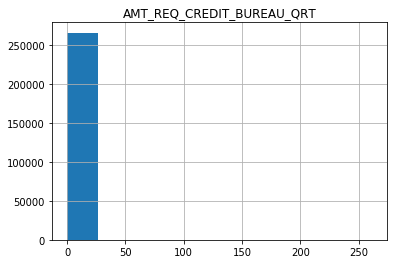

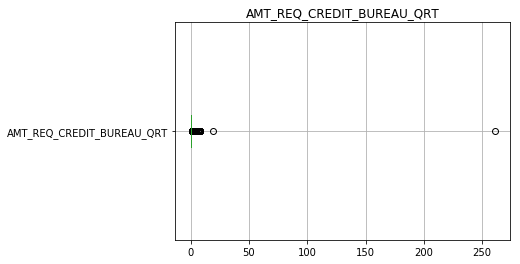

AMT_REQ_CREDIT_BUREAU_YEAR  Range ：  0.0 - 25.0


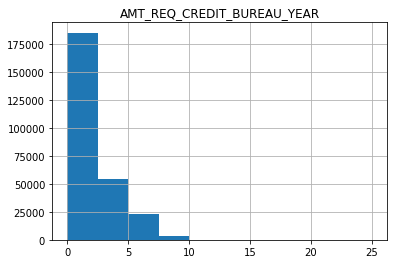

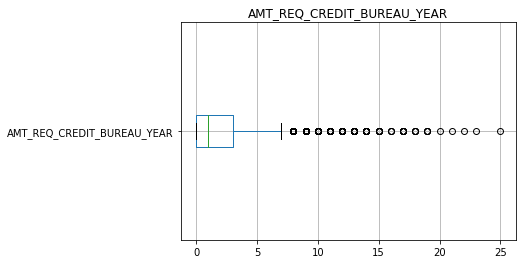

In [7]:
dtype_select = []
for type in app_train.select_dtypes(exclude=["object"]).dtypes:
    if type not in dtype_select:
        dtype_select.append(type)

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns : {}".format(len(numeric_columns)))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
	print(col," Range ： ",app_train[col].min(),"-",app_train[col].max())
	app_train[col].hist()
	plt.title(col)
	plt.show()
	app_train[[col]].boxplot(vert=False)
	plt.title(col)
	plt.show()

In [8]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


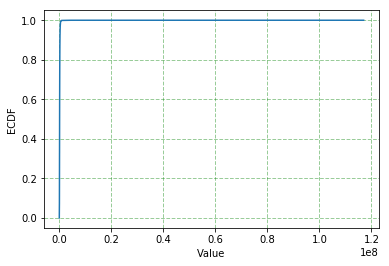

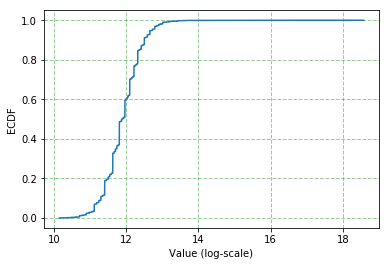

In [9]:
from statsmodels.distributions.empirical_distribution import ECDF
AMT_INCOME_TOTAL=app_train['AMT_INCOME_TOTAL']
print(AMT_INCOME_TOTAL.describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = ECDF(AMT_INCOME_TOTAL)
plt.plot(cdf.x, cdf.y)
plt.grid(color='g', linestyle='--', linewidth=1, alpha=0.4)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(cdf.x[1:]), cdf.y[1:])
plt.grid(color='g', linestyle='--', linewidth=1, alpha=0.4)
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.show()


count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


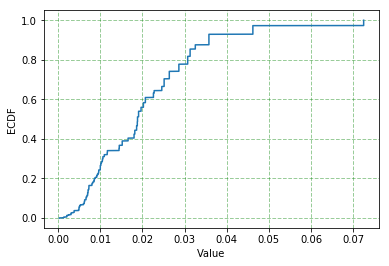

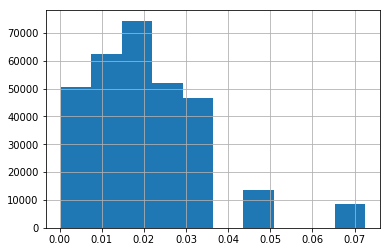

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [10]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = ECDF(app_train['REGION_POPULATION_RELATIVE'])
plt.plot(cdf.x, cdf.y)
plt.grid(color='g', linestyle='--', linewidth=1, alpha=0.4)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


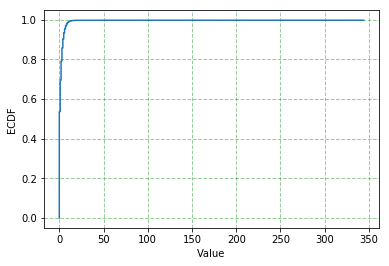

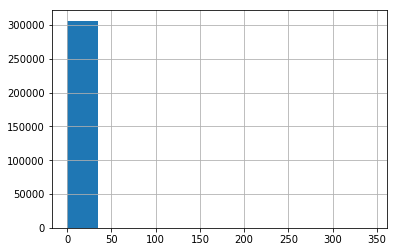

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [11]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = ECDF(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.plot(cdf.x, cdf.y)
plt.grid(color='g', linestyle='--', linewidth=1, alpha=0.4)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()

#當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少)
#這時可以考慮用 value_counts 去找到這些數值
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

# **注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值**

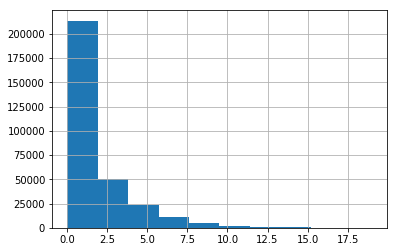

In [12]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.show()